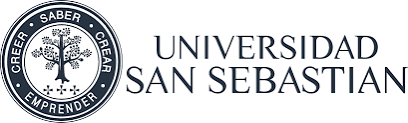

Magister en Data Science

Deep Learning


Profesor: Marco Cedeño

Alumno: Rodrigo Verdugo R.

11501568/11490434 [==============================] - 0s 0us/step


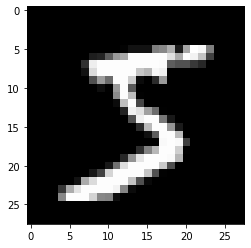

In [1]:
#Resolución del problema con Tensorflow
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
import numpy as np # Import numpy library

mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

plt.imshow(x_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

In [2]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # Normalize the training dataset
x_test = tf.keras.utils.normalize(x_test, axis=1) # Normalize the testing dataset

#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x=x_train, y=y_train, epochs=5) # Start training process

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.2649 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1095 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0565 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9869


In [3]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9736

Test accuracy: 0.9735999703407288


In [4]:
# Verificamos sus predicciones para los datos restantes
esperado = y_test
prediccion = np.argmax(model.predict(x_test), axis=-1)

# Y mostramos los resultados.
from sklearn import metrics

matriz_conf=metrics.confusion_matrix(esperado, prediccion)
clasif_report=metrics.classification_report(esperado, prediccion)

print("Reporte del clasificador: \n %s\n %s\n" %(model, clasif_report))
print("Matriz de confusión:\n%s" % matriz_conf)
#Macro AVG: Promedio normal de métricas F1 para cada clase
#Weighted AVG: Promedio ponderado de F1 por porcentaje de elementos de la clase
#https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

Reporte del clasificador: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.95      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Matriz de confusión:
[[ 974    0    1    0    0    0    2    0    3    0]
 [   0 1114    6    0    0    0    4    0   11    0]
 [   4    0 1017    1    1    0    1    3    4    1]
 [   1    0    9  979    0    1 

Número real: 0


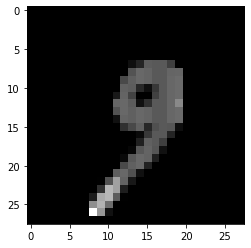

In [5]:
print('Número real: '+str(np.argmax(prediccion[1000]))) # Print out the number
plt.imshow(x_test[1000], cmap="gray") # Import the image
plt.show() # Show the image

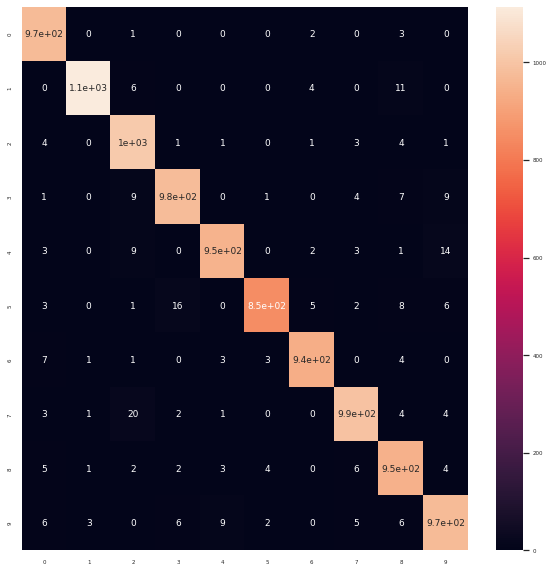

In [6]:
###Visualización mejor de la matriz de confusión###
import seaborn as sn
#snn_cm = confusion_matrix(np.argmax(y_test_onehot, axis=1), np.argmax(y_test_predichos, axis=1))
#snn_df_cm = pd.DataFrame(snn_cm, range(100), range(100))  
#snn_df_cm = pd.DataFrame(snn_cm)
plt.figure(figsize = (10,10))  
sn.set(font_scale=0.5) #for label size  
sn.heatmap(matriz_conf, annot=True, annot_kws={"size": 9}) # font size  
plt.show()

###Ejercicio 1: Analizar el reporte del clasificador, los indicadores de rendimiento y la matriz de confusión



In [7]:
print("Reporte del clasificador: \n %s\n %s\n" %(model, clasif_report))
print("Matriz de confusión:\n%s" % matriz_conf)

Reporte del clasificador: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.95      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Matriz de confusión:
[[ 974    0    1    0    0    0    2    0    3    0]
 [   0 1114    6    0    0    0    4    0   11    0]
 [   4    0 1017    1    1    0    1    3    4    1]
 [   1    0    9  979    0    1 

###Ejercicio 2: Localizar dos elementos para los cuales el modelo haya fallado, y verificar por qué puede haberse equivocado.



Número real: 0


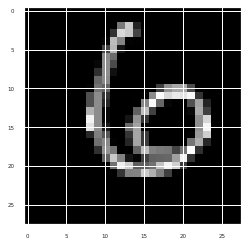

In [9]:
print('Número real: '+str(np.argmax(prediccion[90]))) # Print out the number
plt.imshow(x_test[100], cmap="gray") # Import the image
plt.show() # Show the image

Número real: 0


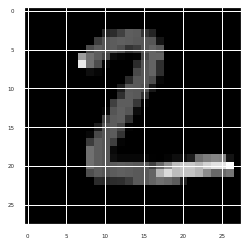

In [10]:
print('Número real: '+str(np.argmax(prediccion[50]))) # Print out the number
plt.imshow(x_test[1], cmap="gray") # Import the image
plt.show() # Show the image

En estos casos, los numeros pueden haber estar mal clasificados en el dataset.

###Ejercicio 3: Probar otras arquitecturas de RN, usando diferentes funciones de activación, learning rates y otros parámetros


Presentar un gráfico con los diferentes resultados de desempeño y sus configuraciones

A modo de mantener semejanzas en las condiciones, se mantendran 10 epocas para cada modelo construido.

En primer lugar, probaremos la arquitectura Sigmoid


In [17]:
#Build the model object
model1 = tf.keras.models.Sequential()
# Add the Flatten Layer
model1.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model1.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
model1.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
# Build the output layer
model1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model1.fit(x=x_train, y=y_train, epochs=10) # Start training process

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5289 - accuracy: 0.8559
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2240 - accuracy: 0.9330
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1651 - accuracy: 0.9504
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1294 - accuracy: 0.9610
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1046 - accuracy: 0.9682
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0867 - accuracy: 0.9733
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0728 - accuracy: 0.9778
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9811
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9839
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.045

In [18]:
# Evaluate the model performance
test_loss, test_acc = model1.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9719

Test accuracy: 0.9718999862670898


In [19]:
# Verificamos sus predicciones para los datos restantes
esperado = y_test
prediccion = np.argmax(model.predict(x_test), axis=-1)

# Y mostramos los resultados.
from sklearn import metrics

matriz_conf=metrics.confusion_matrix(esperado, prediccion)
clasif_report=metrics.classification_report(esperado, prediccion)

print("Reporte del clasificador: \n %s\n %s\n" %(model1, clasif_report))
print("Matriz de confusión:\n%s" % matriz_conf)


Reporte del clasificador: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.95      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Matriz de confusión:
[[ 974    0    1    0    0    0    2    0    3    0]
 [   0 1114    6    0    0    0    4    0   11    0]
 [   4    0 1017    1    1    0    1    3    4    1]
 [   1    0    9  979    0    1 

Obtenemos un accuracy de 97% aproximadamente.

A continuacion, probaremos el desempeño del modelo usando la funcion Tanh

In [20]:
#Build the model object
model2 = tf.keras.models.Sequential()
# Add the Flatten Layer
model2.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model2.add(tf.keras.layers.Dense(128, activation=tf.nn.tanh))
model2.add(tf.keras.layers.Dense(128, activation=tf.nn.tanh))
# Build the output layer
model2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model2.fit(x=x_train, y=y_train, epochs=10) # Start training process

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3103 - accuracy: 0.9090
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1592 - accuracy: 0.9520
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1115 - accuracy: 0.9657
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0823 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0636 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0387 - accuracy: 0.9882
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0298 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0227 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [21]:
# Evaluate the model performance
test_loss, test_acc = model2.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9749

Test accuracy: 0.9749000072479248


In [22]:
# Verificamos sus predicciones para los datos restantes
esperado = y_test
prediccion = np.argmax(model.predict(x_test), axis=-1)

# Y mostramos los resultados.
from sklearn import metrics

matriz_conf=metrics.confusion_matrix(esperado, prediccion)
clasif_report=metrics.classification_report(esperado, prediccion)

print("Reporte del clasificador: \n %s\n %s\n" %(model2, clasif_report))
print("Matriz de confusión:\n%s" % matriz_conf)


Reporte del clasificador: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.95      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Matriz de confusión:
[[ 974    0    1    0    0    0    2    0    3    0]
 [   0 1114    6    0    0    0    4    0   11    0]
 [   4    0 1017    1    1    0    1    3    4    1]
 [   1    0    9  979    0    1 

En ultimo lugar, probaremos la funcion selu

In [23]:
#Build the model object
model3 = tf.keras.models.Sequential()
# Add the Flatten Layer
model3.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model3.add(tf.keras.layers.Dense(128, activation=tf.nn.selu))
model3.add(tf.keras.layers.Dense(128, activation=tf.nn.selu))
# Build the output layer
model3.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model3.fit(x=x_train, y=y_train, epochs=10) # Start training process

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3286 - accuracy: 0.9043
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1839 - accuracy: 0.9441
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9611
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0992 - accuracy: 0.9689
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0805 - accuracy: 0.9742
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - accuracy: 0.9818
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9843
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9864
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

In [24]:
# Evaluate the model performance
test_loss, test_acc = model3.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9709

Test accuracy: 0.9708999991416931


In [25]:
# Verificamos sus predicciones para los datos restantes
esperado = y_test
prediccion = np.argmax(model.predict(x_test), axis=-1)

# Y mostramos los resultados.
from sklearn import metrics

matriz_conf=metrics.confusion_matrix(esperado, prediccion)
clasif_report=metrics.classification_report(esperado, prediccion)

print("Reporte del clasificador: \n %s\n %s\n" %(model3, clasif_report))
print("Matriz de confusión:\n%s" % matriz_conf)


Reporte del clasificador: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.95      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Matriz de confusión:
[[ 974    0    1    0    0    0    2    0    3    0]
 [   0 1114    6    0    0    0    4    0   11    0]
 [   4    0 1017    1    1    0    1    3    4    1]
 [   1    0    9  979    0    1 

Vemos como, en general, los 3 modelos se comportan de formas similares. Es posible que al correr por mas epocas podamos definir que modelo es el mas eficiente.

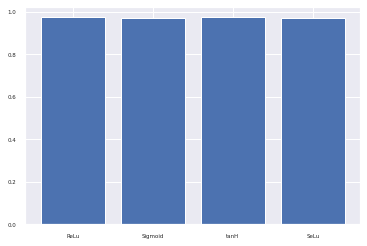

In [26]:
import pandas as pd

data = pd.DataFrame({'wg Av': [0.9736, 0.9719, 0.9749, 0.9709],
                     },
                    index=('ReLu', 'Sigmoid', 'tanH', 'SeLu'))
total = data.sum(axis=1)
plt.bar(total.index, total)
plt.show()


Vemos que los comortamientos, si bien similares, dan ventaja a la funcion TanH, sin embargo, seria factible comparar usando mayor numero de epocas y cambiar la configuracion de neuronas y capas.